*   ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap01/'
OutputDir    = '1Error-0301mlsq/'
FileBaseName = '1Error-0301mlsq'

*   Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/


*   必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0301mlsq/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap01/1Error-0301mlsq/


最確値を書式化して文字列として返す関数

Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False )
*   返値: 書式化された文字列を返す。
*   v_mean: 平均値
*   v_std:  標準偏差
*   s_unit: 値の単位(文字列)
*   std_2digit=True: 標準偏差を2桁表示。Falseにすると1桁表示
*   latex=False: テキスト文字列として出力。Trueでは、図などでlatex表示できる文字列で出力。

In [4]:
def Format_MostProbableValue( v_mean, v_std, s_unit, std_2digits=True, latex=False ):
  #
  # 平均値の冪数
  order_mean = np.floor( np.log10(v_mean) )
  # print( 'order_mean=', order_mean )
  #
  # 標準偏差の冪数
  if std_2digits:
    # 標準偏差を有効2桁表示
    order_std  = np.floor( np.log10(v_std) - 1.0 )
  else:
    # 標準偏差を有効1桁表示
    order_std  = np.floor( np.log10(v_std) - 0.0 )
  # print( 'order_std=', order_std )
  #
  # 平均値の冪数と標準偏差の冪数の符号が同じか?
  if order_mean * order_std > 0.0:
    # 例1
    # v_mean = 4.60572E5
    # v_std  = 8.96E3
    # 例2
    # v_mean = 4.605723E-2
    # v_std  = 8.96E-5
    multi_order = order_std+1
    #
    # 共通する冪数
    multi = 10.0**multi_order
    #
    # 共通する冪数で規格化
    v_mean = v_mean / multi
    v_std  = v_std  / multi
    #
    # 共通した冪数で指数をくくって、係数は少数第1位
    if latex:
      out_str = r'(%+.1f $\pm$ %.1f)$\times10^{%+d}$ ' % (v_mean, v_std, multi_order) + s_unit
    else:
      out_str = '(%+.1f +/- %.1f)x10^(%+d) ' % (v_mean, v_std, multi_order) + s_unit
    #
  else:
    # 平均値の冪数と標準偏差の冪数の符号が異なる
    # 例2
    # v_mean = 4.605723
    # v_std  = 0.0896
    fmt_std1 = r'$%%+.%df$' % -order_std
    fmt_std2 = r'$%%.%df$'  % -order_std
    if latex:
      fmt_str = fmt_std1 + r' $\pm$ ' + fmt_std2 + ' ' + s_unit
    else:
      fmt_str = fmt_std1 + ' +/- ' + fmt_std2 + ' ' + s_unit
    #
    out_str = fmt_str % (v_mean, v_std)
  #
  return out_str

In [5]:
############################################
# 計測データ
Rdata = [4.605, 4.628, 4.652, 4.624, 4.603, 4.613, 4.649, 4.613, 4.625]
Rdata_N = len( Rdata )
#
Rdata_mean     = np.mean( Rdata )
Rdata_std      = np.std( Rdata, ddof=1 )
Rdata_mean_std = Rdata_std / np.sqrt( Rdata_N )
#
print( '測定値の個数     = %d' % Rdata_N )
print( '母集団の標準偏差 = %.4f Ω' % Rdata_std )
print( '平均値           = %.4f Ω' % Rdata_mean )
print( '平均値の標準偏差 = %.4f Ω' % Rdata_mean_std )
print( '最確値           = %s' % Format_MostProbableValue( Rdata_mean, Rdata_mean_std, 'Ω' ) )

測定値の個数     = 9
母集団の標準偏差 = 0.0176 Ω
平均値           = 4.6236 Ω
平均値の標準偏差 = 0.0059 Ω
最確値           = $+4.6236$ +/- $0.0059$ Ω


1.3.1 最確値としての平均値

誤差関数
$$
E(X)=\sum^{M}\xi_{m}^2=\sum^{M}(x_{m}-X)^2
$$

誤差確率
$$
\displaystyle{}P(X)
=
\prod_{m=1}^{M}
\frac{1}{\sigma\sqrt{2\pi}}
\exp\left(
  -\frac{\xi_{m}^2}{2\sigma^2}
\right)
=
\prod_{m=1}^{M}
\frac{1}{\sigma\sqrt{2\pi}}
\exp\left[
  -\frac{(x_{m}-X)^2}{2\sigma^2}
\right]
$$

In [ ]:
# 誤差関数
def ErrFunc(X, data):
  #
  err = 0.0
  #
  for xi in data:
    err = err + (xi-X)**2
  #
  return err
#
# 誤差確率
def ErrProb(X, data, sigma):
  #
  #
  probs = []
  prob_all = 1.0
  #
  for xi in data:
    probs.append( np.exp( -(xi-X)**2 / (2*sigma**2) ) / (sigma*np.sqrt(2*np.pi)) )
    prob_all = prob_all * np.exp( -(xi-X)**2 / (2*sigma**2) ) / (sigma*np.sqrt(2*np.pi))
  #
  probs.append( prob_all )
  return probs

先に求めた平均値と標準偏差を用いて、誤差関数と誤差確率のグラフを描く。

In [7]:
############################################
# 描くRの範囲は、平均値±2標準偏差の範囲とする
R_region = np.linspace( Rdata_mean - 2.0*Rdata_std, Rdata_mean + 2.0*Rdata_std, 51, endpoint=True)
#
# 誤差関数
R_ErrFunc = ErrFunc( R_region, Rdata )
#
# 誤差確率
R_ErrProbs = ErrProb( R_region, Rdata, Rdata_std )
#

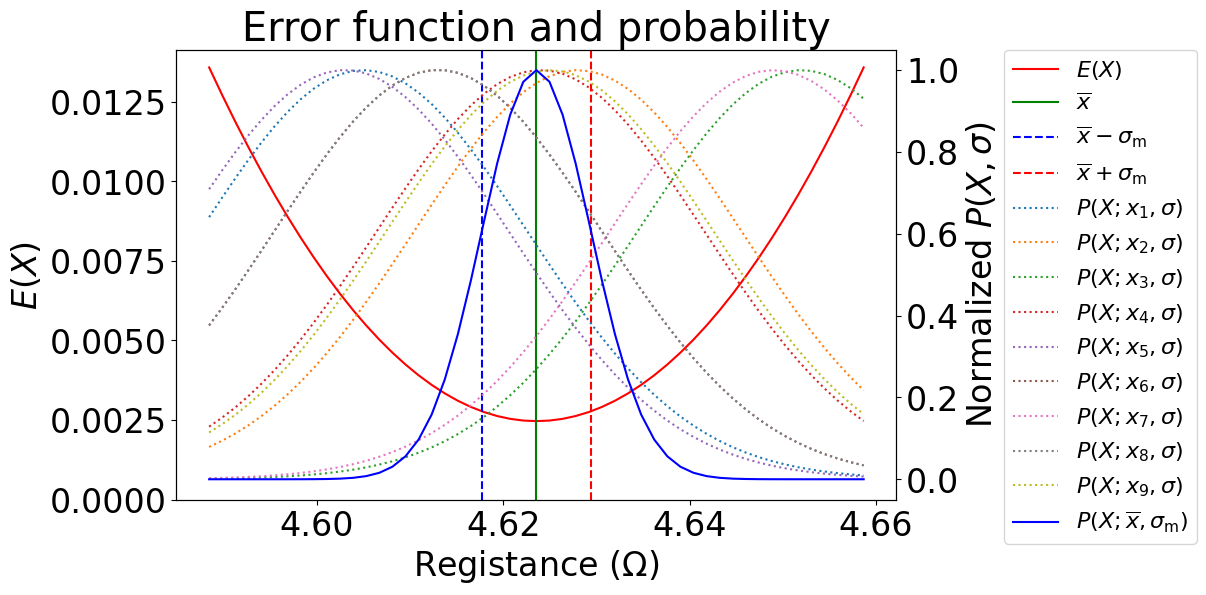

In [8]:
############################################
# グラフを描く
#
plt.rcParams['font.size'] = 24
#
fig = plt.figure( figsize=(12,6) )
#
fig.subplots_adjust(left=0.15, right=0.75, top=0.90, bottom=0.15)
#
# 1つ目のグラフの軸を生成する
ax1 = fig.add_subplot(1,1,1)
#
# 軸ラベル
ax1.set_xlabel( r'Registance ($\Omega$)' )
ax1.set_ylabel( r'$E(X)$' )
#
# 誤差関数
ax1.plot( R_region, R_ErrFunc, color='red', label=r'$E(X)$' )
#
ax1bot, ax1_top = ax1.set_ylim()
ax1.set_ylim( 0, ax1_top )
#
ax1.axvline( Rdata_mean,                0, 1.0, label=r'$\overline{x}$',        color='green' )
ax1.axvline( Rdata_mean-Rdata_mean_std, 0, 1.0, label=r'$\overline{x}-\sigma_{\rm{}m}$', color='blue', linestyle='dashed' )
ax1.axvline( Rdata_mean+Rdata_mean_std, 0, 1.0, label=r'$\overline{x}+\sigma_{\rm{}m}$', color='red',  linestyle='dashed' )
#
ax1line, ax1label   = ax1.get_legend_handles_labels()
#
# もう一つ軸を追加する
ax1R = ax1.twinx()
#
# 軸ラベル
ax1R.set_ylabel( r'Normalized $P(X, \sigma)$' )
# ax1R.set_yscale('log')
#
# 誤差確率
for idx in range( len(R_ErrProbs)-1 ):
  ax1R.plot( R_region, R_ErrProbs[idx] / np.amax(R_ErrProbs[idx]) , label=r'$P(X; x_{%d},\sigma)$' % (idx+1), linestyle='dotted' )
#
R_ErrProb = R_ErrProbs[len(R_ErrProbs)-1]
ax1R.plot( R_region, R_ErrProb / np.amax( R_ErrProb ), label=r'$P(X;\overline{x},\sigma_{\rm{}m})$', color='blue', linestyle='solid' )
#
ax1Rline, ax1Rlabel   = ax1R.get_legend_handles_labels()
#
ax1.legend(ax1line + ax1Rline, ax1label + ax1Rlabel, fontsize=16, bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0)
#
plt.title( 'Error function and probability' )
#
# plt.legend()
#
plt.show()
#
# 図をpdfに保存
fig.savefig( FilePath + FileBaseName + '.pdf' )